# Internship Number- DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Automobile_insurance_fraud.csv',names=['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'])

In [4]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['insured_zip','policy_number','incident_location','auto_model'],axis=1,inplace=True)

In [8]:
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   
2            own-child          35100             0    22-02-2015   
3            unmarried          48900        -62400    10-01-2015   
4            unmarried          66000        -46000    17-02-2015   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  \
0          6510           13020          52080       Saab       2004   
1           780             780           3510   Mercedes       2007   
2          7700            3850          23100      Dodge       2007   
3          6340            6340          50720  Chevrolet       2014   
4          1300             650           4550     Accura       2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N

<AxesSubplot:xlabel='age', ylabel='Density'>

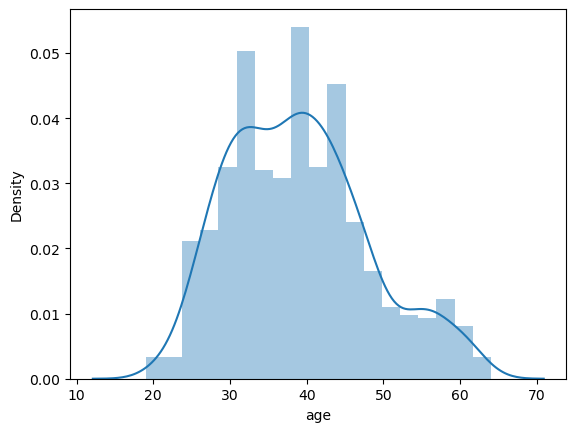

In [9]:
sns.distplot(df['age'])

In [10]:
bins = [0, 10,20, 30, 40, 50, 60, 70, 80, float('inf')]
lab = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

In [11]:
df['Age'] = pd.cut(df['age'], bins=bins, labels=lab)

<AxesSubplot:>

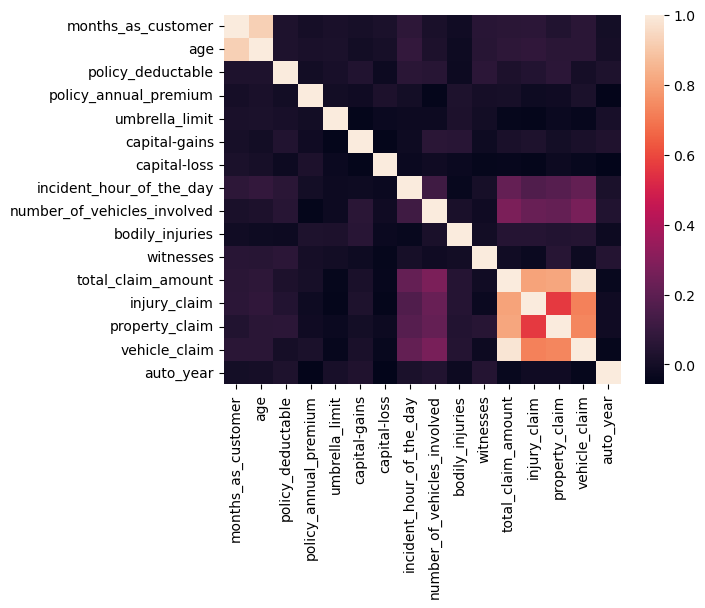

In [12]:
sns.heatmap(df.corr())

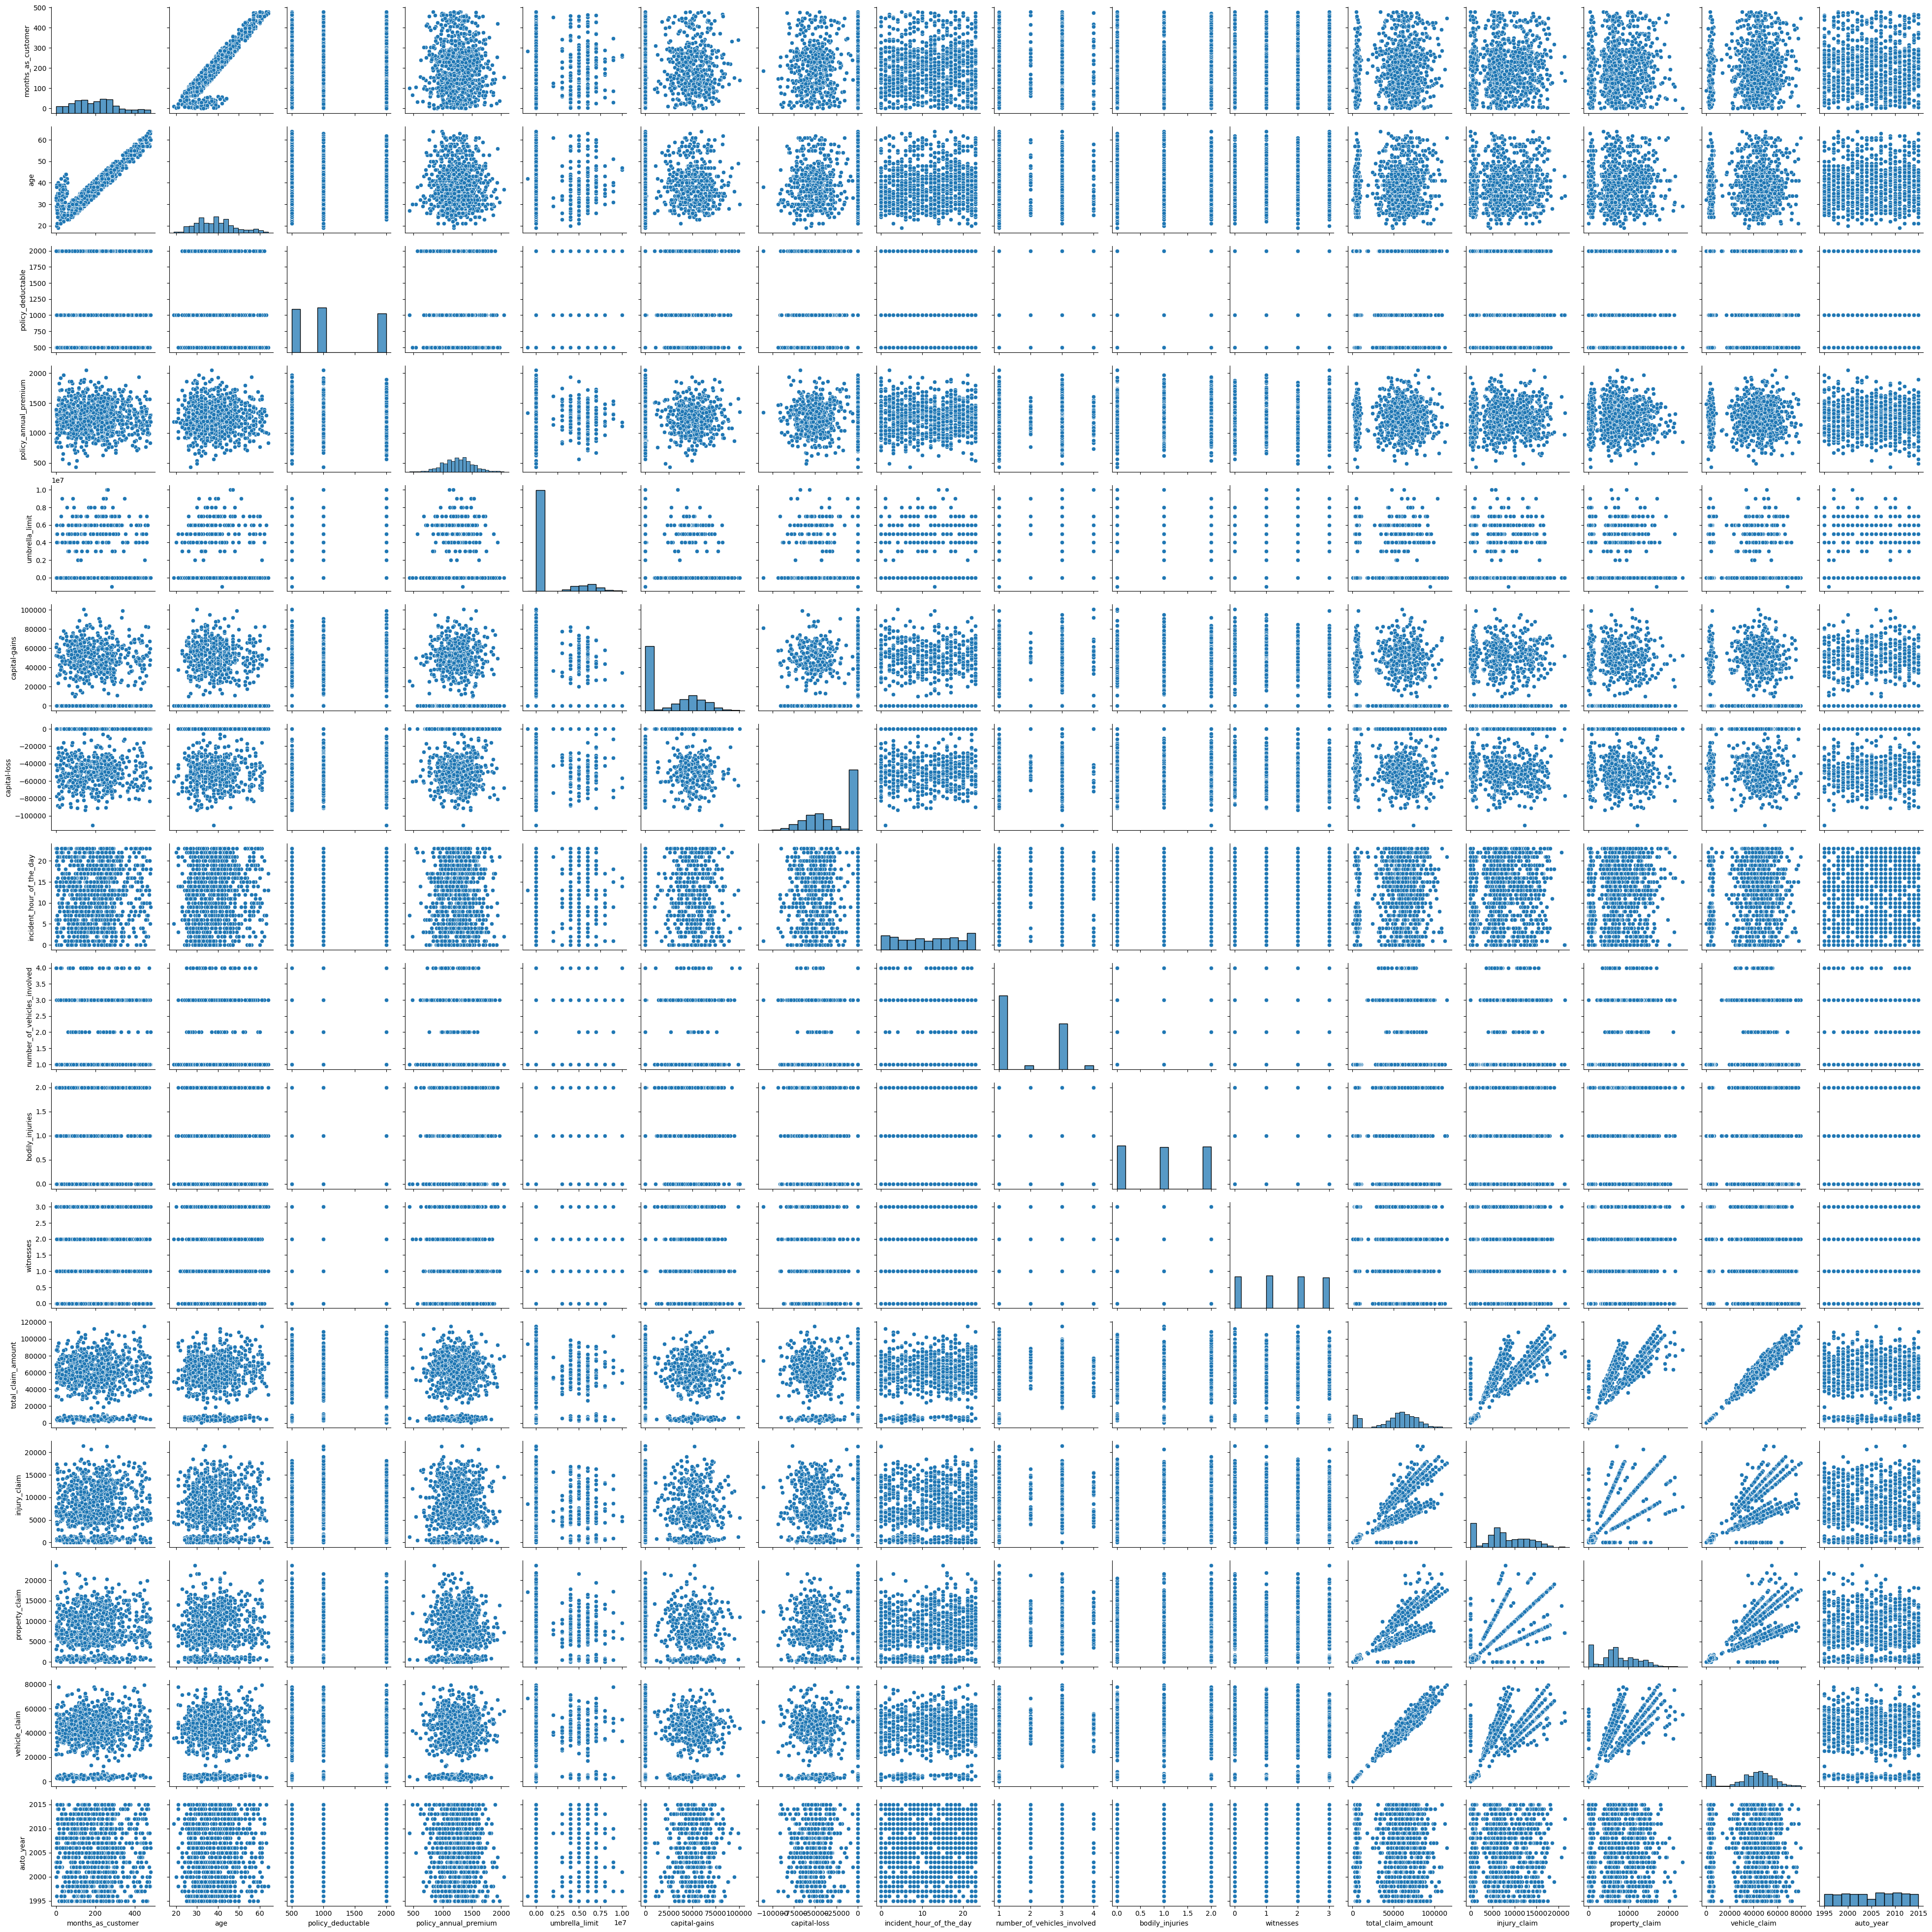

In [13]:
sns.pairplot(df)

In [12]:
df.drop(['age'],axis=1,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

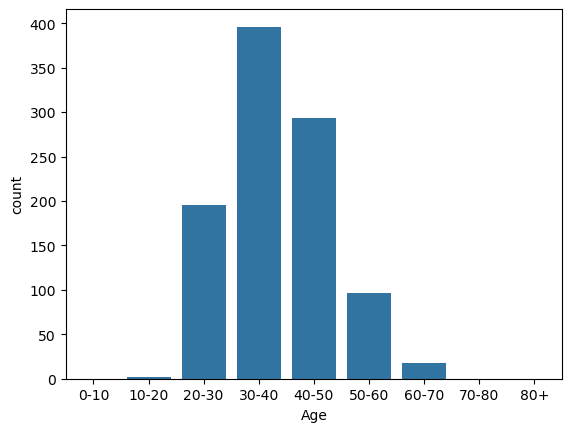

In [13]:
sns.countplot(x=df['Age'])

In [14]:
df['Policy_B_Date'] = pd.to_datetime(df['policy_bind_date'])
df['Inc_Date'] = pd.to_datetime(df['incident_date'])

In [15]:
df.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [16]:
df['Policy_B_year'] = df['Policy_B_Date'].dt.year
df['Policy_B_month'] = df['Policy_B_Date'].dt.month
df['Inc_year'] = df['Inc_Date'].dt.year
df['Inc_month'] = df['Inc_Date'].dt.month

In [17]:
df.drop(['Inc_Date','Policy_B_Date'],axis=1,inplace=True)

In [18]:
df[['csl_lim1', 'csl_lim2']] = df['policy_csl'].str.split('/', expand=True)

In [19]:
df['csl_lim1'] = df['csl_lim1'].astype(int)
df['csl_lim2'] = df['csl_lim2'].astype(int)

df.drop(['policy_csl'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   policy_state                 1000 non-null   object  
 2   policy_deductable            1000 non-null   int64   
 3   policy_annual_premium        1000 non-null   float64 
 4   umbrella_limit               1000 non-null   int64   
 5   insured_sex                  1000 non-null   object  
 6   insured_education_level      1000 non-null   object  
 7   insured_occupation           1000 non-null   object  
 8   insured_hobbies              1000 non-null   object  
 9   insured_relationship         1000 non-null   object  
 10  capital-gains                1000 non-null   int64   
 11  capital-loss                 1000 non-null   int64   
 12  incident_type                1000 non-null   object  
 13  coll

In [21]:
df.head()

months_as_customer policy_state  policy_deductable  policy_annual_premium  \
0                 328           OH               1000                1406.91   
1                 228           IN               2000                1197.22   
2                 134           OH               2000                1413.14   
3                 256           IL               2000                1415.74   
4                 228           IL               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_year  \
0          6510           13020          52080       Saab       2004   
1           780             780           3510   Mercedes       2007   
2          7700            3850          23100      Dodge       2007   
3          6340            6340          50720  Chevrolet       2014   
4          1300             650           4550     Accura       2009   

  fraud_reported    Age  Policy_B_year  Policy_B_month  Inc_year  Inc_month  \
0              Y  40-50           2014              10      2015          1   
1              Y  40-50           2006               6      2015          1   
2              N  20-30           2000               6      2015          2   
3              Y  40-50           1990               5      2015         10   
4              N  40-50           2014               6      2015          2   

   csl_lim1  csl_lim2  
0       250       500  
1       250       500  
2   

<AxesSubplot:xlabel='incident_type', ylabel='Count'>

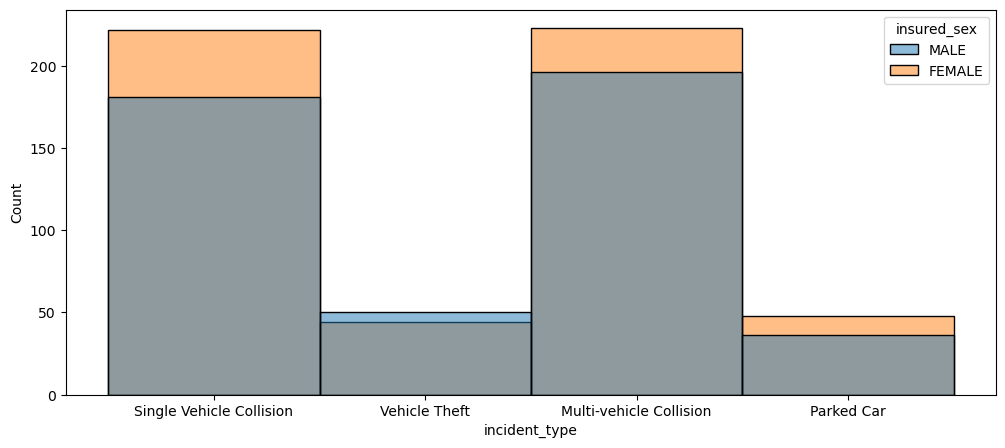

In [22]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['incident_type'],hue=df['insured_sex'])

<AxesSubplot:xlabel='insured_education_level', ylabel='Count'>

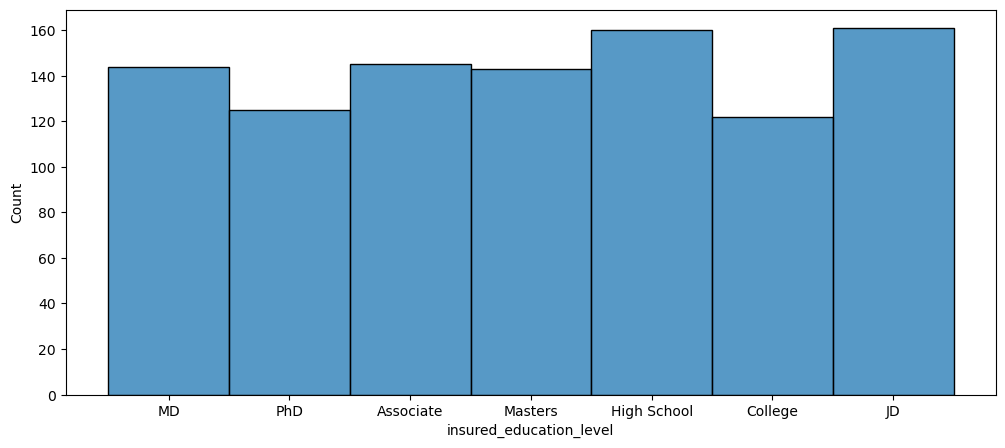

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['insured_education_level'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

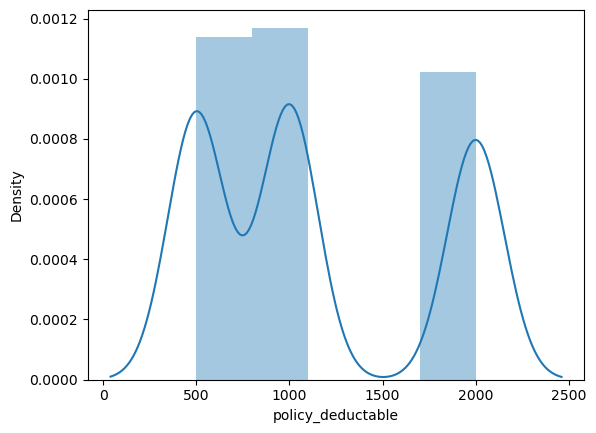

In [24]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

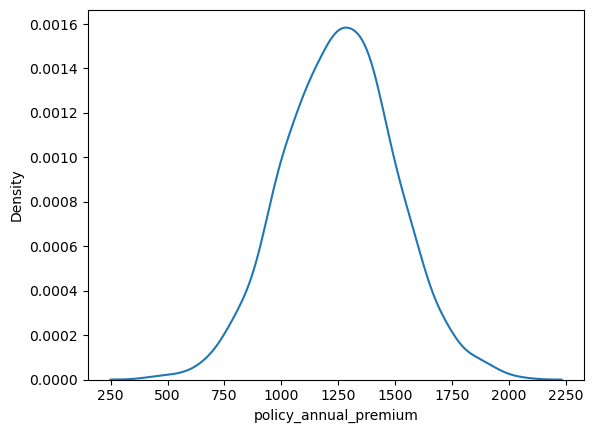

In [25]:
sns.kdeplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

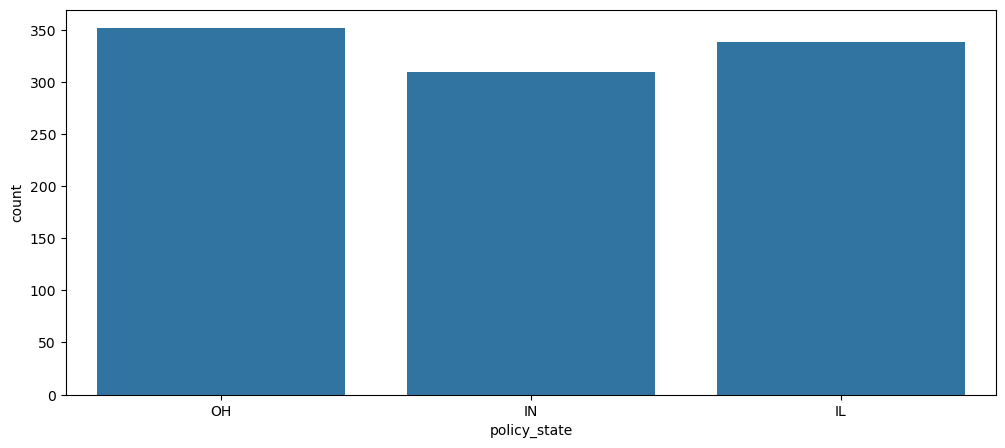

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['policy_state'])

<AxesSubplot:xlabel='Age', ylabel='policy_annual_premium'>

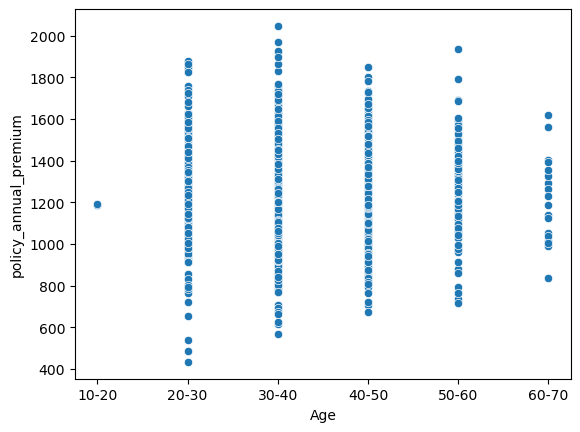

In [27]:
sns.scatterplot(x=df['Age'],y=df['policy_annual_premium'])

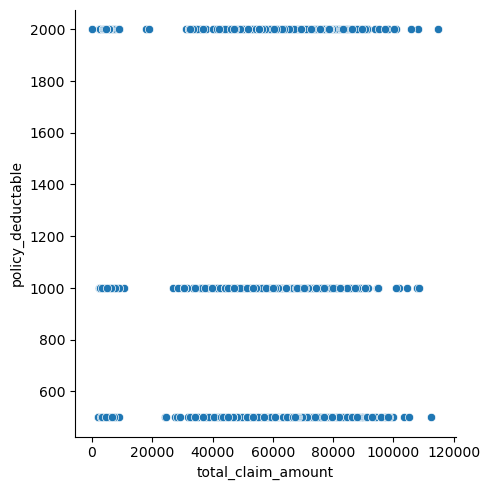

In [28]:
sns.relplot(x=df['total_claim_amount'],y=df['policy_deductable'])

<AxesSubplot:xlabel='csl_lim1', ylabel='csl_lim2'>

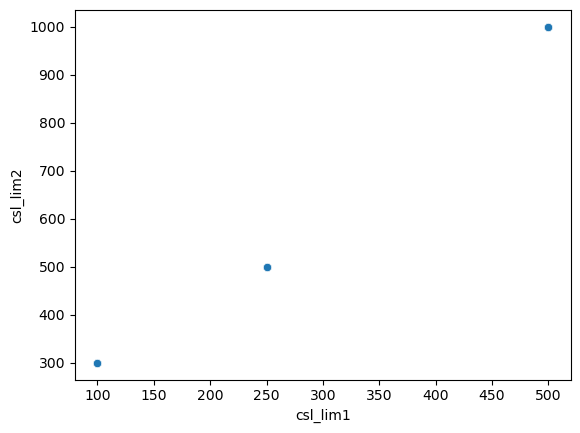

In [29]:
sns.scatterplot(x=df['csl_lim1'],y=df['csl_lim2'])

([<matplotlib.patches.Wedge at 0x1b7c95c8a60>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')])

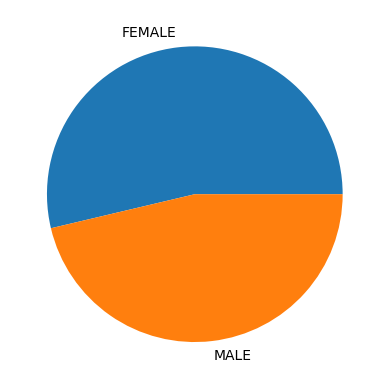

In [30]:
plt.pie(df['insured_sex'].value_counts(),labels=df['insured_sex'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b7c9611490>,
 [Text(0.9688889178330586, 0.5208207608191946, 'Springfield'),
  Text(0.11727225045112066, 1.0937308715009053, 'Arlington'),
  Text(-0.818229653525706, 0.735187210233695, 'Columbus'),
  Text(-1.0798630984978679, -0.20951297931771282, 'Northbend'),
  Text(-0.5086045173784168, -0.9753570858420355, 'Hillsdale'),
  Text(0.4113551545846274, -1.0201896572680285, 'Riverwood'),
  Text(1.0201896861534128, -0.4113550829468398, 'Northbrook')])

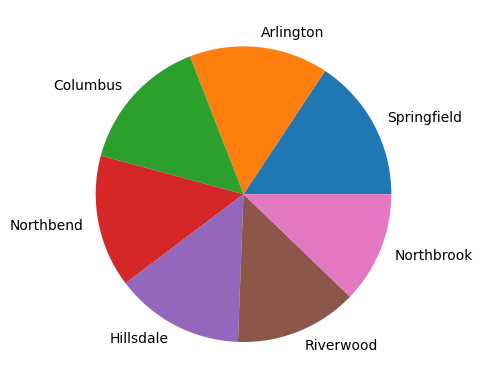

In [31]:
plt.pie(df['incident_city'].value_counts(),labels=df['incident_city'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b7c9667bb0>,
 [Text(1.0654414787782402, 0.27355886989611045, 'Saab'),
  Text(0.8018655028537539, 0.7530018030078657, 'Dodge'),
  Text(0.33991872319707334, 1.046162158377023, 'Suburu'),
  Text(-0.19932630899680504, 1.0817897312055196, 'Nissan'),
  Text(-0.679645547352248, 0.8649172966037061, 'Chevrolet'),
  Text(-0.9953097349102211, 0.4683572691791445, 'Ford'),
  Text(-1.0999131495663506, -0.013822568901300515, 'BMW'),
  Text(-0.9863051779464792, -0.48703397823556843, 'Toyota'),
  Text(-0.6877669918964675, -0.8584733920499136, 'Audi'),
  Text(-0.2668592342048289, -1.0671392360510472, 'Accura'),
  Text(0.19932628367568853, -1.0817897358710884, 'Volkswagen'),
  Text(0.6268386525977856, -0.9039210715595652, 'Jeep'),
  Text(0.9379041592647687, -0.5747484563127141, 'Mercedes'),
  Text(1.0836202500938787, -0.18912206002071738, 'Honda')])

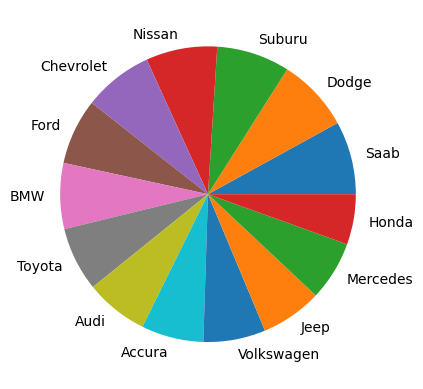

In [32]:
plt.pie(df['auto_make'].value_counts(),labels=df['auto_make'].value_counts().index)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

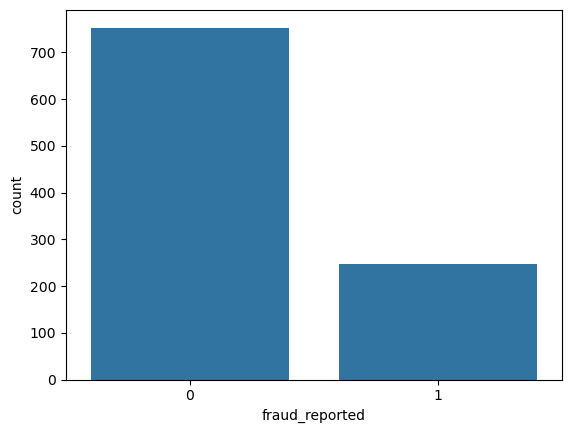

In [48]:
sns.countplot(x=df['fraud_reported'])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [49]:
x_ = df.drop(['fraud_reported'],axis=1)
y_ = df.fraud_reported

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x_,y_)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['fea'] = x.columns

vif

vif                          fea
0     3.921307           months_as_customer
1     1.080740                 policy_state
2     1.068760            policy_deductable
3     1.057775        policy_annual_premium
4     1.036911               umbrella_limit
5     1.067949                  insured_sex
6     1.060644      insured_education_level
7     1.038669           insured_occupation
8     1.059209              insured_hobbies
9     1.058761         insured_relationship
10    1.052389                capital-gains
11    1.044280                 capital-loss
12    3.724437                incident_type
13    1.604204               collision_type
14    1.289317            incident_severity
15    1.106209        authorities_contacted
16    1.061218               incident_state
17    1.044135                incident_city
18    1.110315     incident_hour_of_the_day
19    3.609107  number_of_vehicles_involved
20    1.076605              property_damage
21    1.046715              bodily_injuries
22    1.064754                    witnesses
23    1.080238      police_report_available
24  119.078139           total_claim_amount
25    8.239110                 injury_claim
26    8.222495               property_claim
27   57.620667                vehicle_claim
28    1.038323                    auto_make
29    1.032204                    auto_year
30    3.935435                          Age
31    1.040280                Policy_B_year
32    1.056219               Policy_B_month
33         NaN                     Inc_year
34    1.035621                    Inc_month
35         inf                     csl_lim1
36         inf                     csl_lim2

In [56]:
x2=x.drop(['csl_lim1','csl_lim2','total_claim_amount','Inc_year'], axis=1)

In [57]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x2)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['fea'] = x2.columns

vif

vif                          fea
0   3.895996           months_as_customer
1   1.079775                 policy_state
2   1.065173            policy_deductable
3   1.055544        policy_annual_premium
4   1.036369               umbrella_limit
5   1.067584                  insured_sex
6   1.056022      insured_education_level
7   1.035781           insured_occupation
8   1.058571              insured_hobbies
9   1.054861         insured_relationship
10  1.051636                capital-gains
11  1.041037                 capital-loss
12  3.702520                incident_type
13  1.440059               collision_type
14  1.276525            incident_severity
15  1.098206        authorities_contacted
16  1.057784               incident_state
17  1.040411                incident_city
18  1.109510     incident_hour_of_the_day
19  3.598550  number_of_vehicles_involved
20  1.075696              property_damage
21  1.044764              bodily_injuries
22  1.052340                    witnesses
23  1.075886      police_report_available
24  1.947397                 injury_claim
25  2.023571               property_claim
26  2.649536                vehicle_claim
27  1.038286                    auto_make
28  1.030597                    auto_year
29  3.910856                          Age
30  1.040192                Policy_B_year
31  1.052230               Policy_B_month
32  1.035589                    Inc_month

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression() 
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rc = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8196286472148541
--------------------------------------------------
[[142  35]
 [ 33 167]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81       177
           1       0.83      0.83      0.83       200

    accuracy                           0.82       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.82      0.82      0.82       377

--------------------------------------------------
Score_train: 0.8024800708591674


In [61]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8196286472148541
--------------------------------------------------
[[139  38]
 [ 30 170]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.82      0.79      0.80       177
           1       0.82      0.85      0.83       200

    accuracy                           0.82       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.82      0.82      0.82       377

--------------------------------------------------
Score_train: 1.0


In [62]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred_train = kn.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.726790450928382
--------------------------------------------------
[[ 80  97]
 [  6 194]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.93      0.45      0.61       177
           1       0.67      0.97      0.79       200

    accuracy                           0.73       377
   macro avg       0.80      0.71      0.70       377
weighted avg       0.79      0.73      0.70       377

--------------------------------------------------
Score_train: 0.7953941541186891


In [63]:
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8779840848806366
--------------------------------------------------
[[154  23]
 [ 23 177]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.89      0.89      0.89       200

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377

--------------------------------------------------
Score_train: 1.0


In [64]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8488063660477454
--------------------------------------------------
[[148  29]
 [ 28 172]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.84      0.84      0.84       177
           1       0.86      0.86      0.86       200

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377

--------------------------------------------------
Score_train: 0.9654561558901683


In [65]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.843501326259947
--------------------------------------------------
[[156  21]
 [ 38 162]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.80      0.88      0.84       177
           1       0.89      0.81      0.85       200

    accuracy                           0.84       377
   macro avg       0.84      0.85      0.84       377
weighted avg       0.85      0.84      0.84       377

--------------------------------------------------
Score_train: 0.9530558015943312


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('*'*50)
print('Log reg:',lr_score.mean())

[0.62913907 0.57615894 0.56291391 0.7615894  0.69536424 0.78145695
 0.78       0.73333333 0.77333333 0.75333333]
**************************************************
Log reg: 0.7046622516556291


In [68]:
dt_score = cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('*'*50)
print('Decision Tree:',dt_score.mean())

[0.70198675 0.77483444 0.78145695 0.76821192 0.87417219 0.85430464
 0.82666667 0.87333333 0.83333333 0.79333333]
**************************************************
Decision Tree: 0.8081633554083885


In [69]:
kn_score = cross_val_score(kn,x,y,cv=10)
print(kn_score)
print('*'*50)
print('KNN:',kn_score.mean())

[0.68211921 0.70198675 0.65562914 0.75496689 0.80794702 0.78807947
 0.76666667 0.74666667 0.76666667 0.77333333]
**************************************************
KNN: 0.7444061810154525


In [70]:
gb_score = cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('*'*50)
print('Grad Boost:',gb_score.mean())

[0.76821192 0.76821192 0.78807947 0.87417219 0.90066225 0.89403974
 0.88666667 0.92       0.92666667 0.91333333]
**************************************************
Grad Boost: 0.8640044150110375


In [71]:
rc_score = cross_val_score(rc,x,y,cv=10)
print(rc_score)
print('*'*50)
print('Random Forest:',rc_score.mean())

[0.76821192 0.76821192 0.73509934 0.8807947  0.9205298  0.90066225
 0.9        0.94666667 0.94       0.92666667]
**************************************************
Random Forest: 0.8686843267108166


In [72]:
svm_score = cross_val_score(svm,x,y,cv=10)
print(svm_score)
print('*'*50)
print('SVM',svm_score.mean())

[0.64900662 0.60927152 0.54966887 0.58278146 0.52980132 0.59602649
 0.59333333 0.63333333 0.56666667 0.62666667]
**************************************************
SVM 0.5936556291390728


In [74]:
#random forest classifier gives good accuracy

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10,11],
    'min_samples_leaf': [5,6]}

In [77]:
rc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [79]:
rc = RandomForestClassifier()
grd = GridSearchCV(estimator=rc, param_grid=params)
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [100, 200, 300]})

In [80]:
best_ext = grd.best_estimator_
best_ext.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10)

In [81]:
best_ext.score(x_test,y_test)

0.8594164456233422

In [83]:
import pickle
import joblib

model_class = rc

file = 'Insurance_Fraud_pred.pkl'
pickle.dump(model_class, open(file,'wb'))

loaded_model = pickle.load(open('Insurance_Fraud_pred.pkl','rb'))

Insurance Claim Fraud Detection 
Observations

•	In the overall dataset, there are no duplicated values
•	Columns: 39 and Rows:1000
•	The insured people are maximum in the age group 30-40
•	Female clients have reported the most compared to Male
•	There is a label imbalance which has been balanced by oversampling
•   Single vehicle and multi vehicle collision stands the most no.of accidents
•   The best model for classification is Random Forest Classifier with 0.86 accuracy score